In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv("Predict Students Dropout.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [5]:
Sel_Col = ['Scholarship holder', 'Tuition fees up to date', 'Age at enrollment', 'Course','Target']
data = data[Sel_Col]

In [6]:
data.head()

,Scholarship holder,Tuition fees up to date,Age at enrollment,Course,Target
0,0,1,20,171,Dropout
1,0,0,19,9254,Graduate
2,0,0,19,9070,Dropout
3,0,1,20,9773,Graduate
4,0,1,45,8014,Graduate


In [7]:
data['Scholarship holder'].unique()

array([0, 1])

In [8]:
# Replace 'Enrolled' with 'Graduate' since Enrolled students will soon be graduating
data['Target'] = data['Target'].replace('Graduate', '1')
data['Target'] = data['Target'].replace('Dropout', '0')
data['Target'] = data['Target'].replace('Enrolled','1')

In [9]:
data.head()

,Scholarship holder,Tuition fees up to date,Age at enrollment,Course,Target
0,0,1,20,171,0
1,0,0,19,9254,1
2,0,0,19,9070,0
3,0,1,20,9773,1
4,0,1,45,8014,1


In [10]:
data['Target'].unique()

array(['0', '1'], dtype=object)

In [11]:
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [12]:
X = data.drop('Target', axis=1)
y = data['Target']

In [13]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3539, 4)
X_test :  (885, 4)
y_train :  (3539,)
y_test :  (885,)


In [14]:
# Fit and resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [15]:
# Create a new DataFrame to see the results
resampled_data = pd.DataFrame(X_resampled)
resampled_data['Target'] = y_resampled

print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
Target
1    3003
0    1421
Name: count, dtype: int64

Resampled class distribution:
Target
0    3003
1    3003
Name: count, dtype: int64


In [16]:
X = resampled_data.drop('Target', axis=1)
y = resampled_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (4804, 4)
X_test :  (1202, 4)
y_train :  (4804,)
y_test :  (1202,)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-score: 0.71


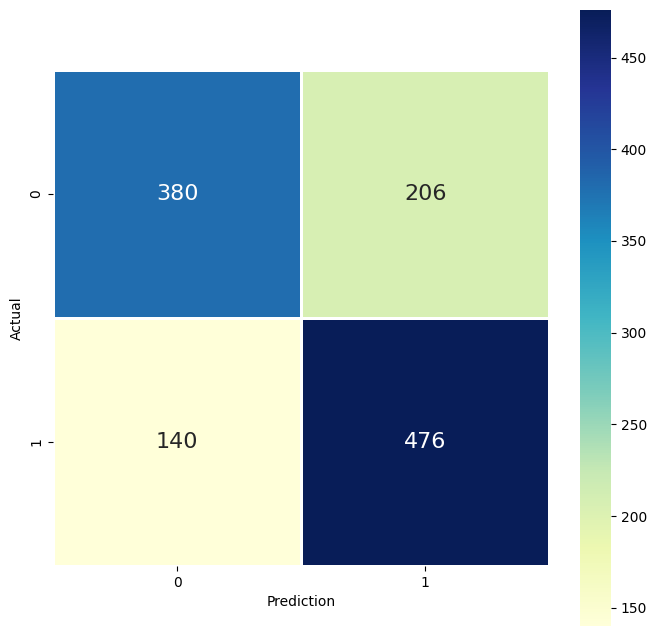

In [18]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

##### Cross validation of how different hyperparameter affects the preformance

In [19]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean CV Score: {mean_score:.3f} with params: {params}")


Mean CV Score: 0.720 with params: {'max_depth': 5, 'n_estimators': 50}
Mean CV Score: 0.720 with params: {'max_depth': 5, 'n_estimators': 100}
Mean CV Score: 0.719 with params: {'max_depth': 5, 'n_estimators': 150}
Mean CV Score: 0.718 with params: {'max_depth': 5, 'n_estimators': 200}
Mean CV Score: 0.737 with params: {'max_depth': 10, 'n_estimators': 50}
Mean CV Score: 0.737 with params: {'max_depth': 10, 'n_estimators': 100}
Mean CV Score: 0.736 with params: {'max_depth': 10, 'n_estimators': 150}
Mean CV Score: 0.735 with params: {'max_depth': 10, 'n_estimators': 200}
Mean CV Score: 0.734 with params: {'max_depth': 20, 'n_estimators': 50}
Mean CV Score: 0.735 with params: {'max_depth': 20, 'n_estimators': 100}
Mean CV Score: 0.736 with params: {'max_depth': 20, 'n_estimators': 150}
Mean CV Score: 0.731 with params: {'max_depth': 20, 'n_estimators': 200}
Mean CV Score: 0.736 with params: {'max_depth': 30, 'n_estimators': 50}
Mean CV Score: 0.734 with params: {'max_depth': 30, 'n_esti

C:\Users\Suresh\AppData\Local\Temp\ipykernel_11252\524679273.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')


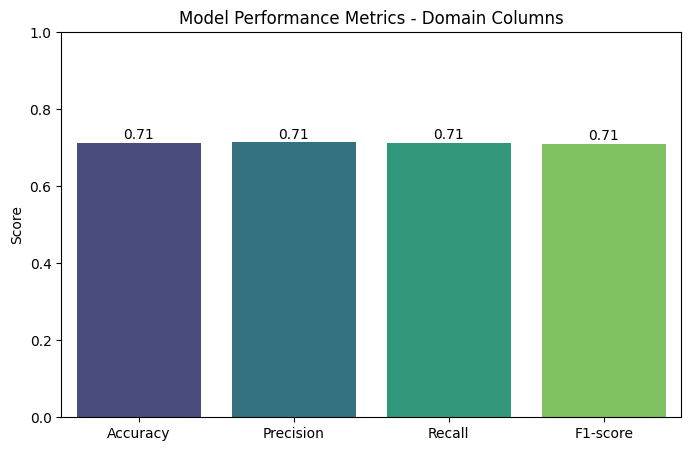

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


# Create a DataFrame from the metrics
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Set up the figure
plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Score')
plt.title('Model Performance Metrics - Domain Columns')

# Show the value on top of each bar
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center')

# Show the plot
plt.show()


In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix - Domain Columns', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)

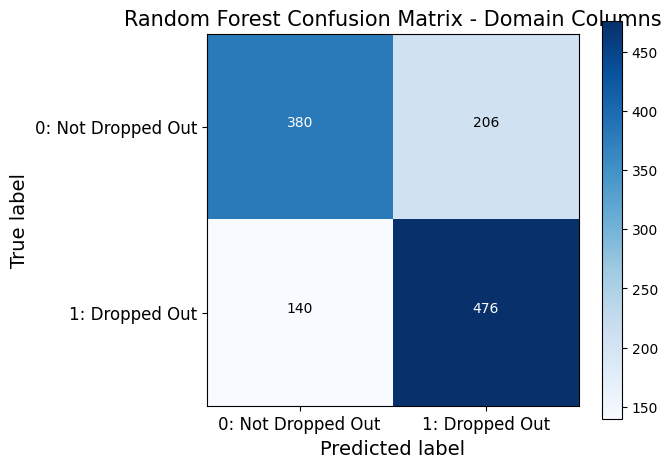

In [22]:
import itertools
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names (adjust according to your specific classes)
class_names = ['0: Not Dropped Out', '1: Dropped Out']  # Update this as necessary
plot_confusion_matrix(cm, classes=class_names, title='Random Forest Confusion Matrix - Domain Columns')

# Show the plot
plt.show()

In [23]:
# Print classification report
print('Random Forest: Classification Report - Domain Columns')
print(classification_report(y_test, y_pred, target_names=['Not Dropped Out', 'Dropped Out']))

# Calculate and print ROC AUC score
rf_probs = best_rf.predict_proba(X_test)
print('ROC - Area Under the Curve: ', round(roc_auc_score(y_test, rf_probs[:, 1]), 2))

Random Forest: Classification Report - Domain Columns
                 precision    recall  f1-score   support

Not Dropped Out       0.73      0.65      0.69       586
    Dropped Out       0.70      0.77      0.73       616

       accuracy                           0.71      1202
      macro avg       0.71      0.71      0.71      1202
   weighted avg       0.71      0.71      0.71      1202

ROC - Area Under the Curve:  0.79


Random Forest: Classification Report - Domain Columns
                 precision    recall  f1-score   support

Not Dropped Out       0.73      0.65      0.69       586
    Dropped Out       0.70      0.77      0.73       616

       accuracy                           0.71      1202
      macro avg       0.71      0.71      0.71      1202
   weighted avg       0.71      0.71      0.71      1202

ROC - Area Under the Curve:  0.79


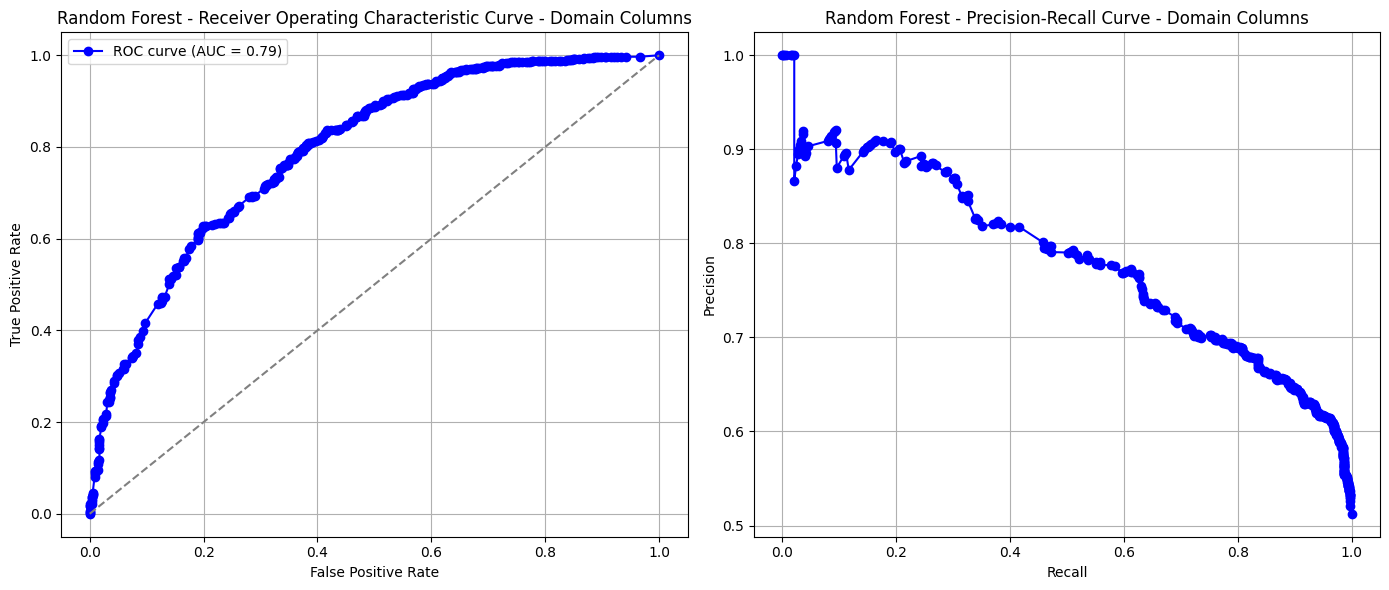

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, precision_recall_curve, roc_auc_score, 
                             classification_report)

# Convert y_test to integers if they are strings
y_test = y_test.astype(int)


# Print classification report
print('Random Forest: Classification Report - Domain Columns')
print(classification_report(y_test, np.argmax(rf_probs, axis=1), target_names=['Not Dropped Out', 'Dropped Out']))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, rf_probs[:, 1])
print('ROC - Area Under the Curve: ', round(roc_auc, 2))

# Plot ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, rf_probs[:, 1])
plt.figure(figsize=(14, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='o', color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Random Forest - Receiver Operating Characteristic Curve - Domain Columns')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, rf_probs[:, 1])

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o', color='blue')
plt.title('Random Forest - Precision-Recall Curve - Domain Columns')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()

plt.tight_layout()
plt.show()


In [25]:
import joblib
joblib.dump(best_rf, "Random_Forest_Model_With_Domain_Columns")




['Random_Forest_Model_With_Domain_Columns']